# Linear regression
* Ordinary least square (MLE)
* Ridge regression (MAP)
* Bayesian linear regression (Posterior)

## A case of overfitting
To explore what overfitting looks like, We will generate a simple dataset where we know the underlying true function and the noise.

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


import numpy as np
import pandas as pd
np.random.seed(111)


%matplotlib inline

In [3]:
def true_function(x):
    return x**2

### Make training and test data

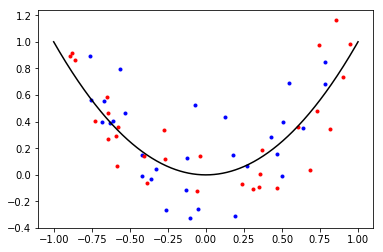

In [4]:
n_train = 30
n_test = 30 
sig = 0.2 # standard deviation of noise

x_train = 1.6*np.random.rand(n_train) - 0.8
y_train = true_function(x_train) + sig*np.random.randn(n_train)

x_test = 2*np.random.rand(n_test) - 1
y_test = true_function(x_test) + sig*np.random.randn(n_test)

# visualize training data, test data, and fit
plt.plot(x_train, y_train, 'b.')
plt.plot(x_test, y_test, 'r.')
x_plot = np.linspace(-1,1,500)
y_true = true_function(x_plot)
plt.plot(x_plot, y_true, '-k')

In [5]:
# The true expected square deviation (error) of one training datum from the true function is:
expected_err = sig**2
print(expected_err)

# The empirical square deviation (error) of the training data from the true function is:
emp_true_train_err = np.mean((y_train - true_function(x_train))**2)
print(emp_true_train_err)
# These two errors would be considered similar.

0.04000000000000001
0.055048396112855835


### 1. test errors 

In [6]:
# The expected square deviation (error) of one test datum from the true function
ans = sig**2
print(ans)

# The emprical square deviation (error) of the test data from the true function
emp_true_test_err = np.mean((y_test - true_function(x_test))**2)
print(emp_true_test_err)
# These two errors would be considered similar.

0.04000000000000001
0.04086542343963205


### Make features

In [32]:
n_feature = 20
X_train = np.zeros([len(x_train), n_feature])
X_test = np.zeros([len(x_test), n_feature])
X_plot = np.zeros([len(x_plot), n_feature])
for i in range(n_feature):
    X_train[:,i] = x_train.T**i
    X_test[:,i] = x_test.T**i
    X_plot[:,i] = x_plot.T**i


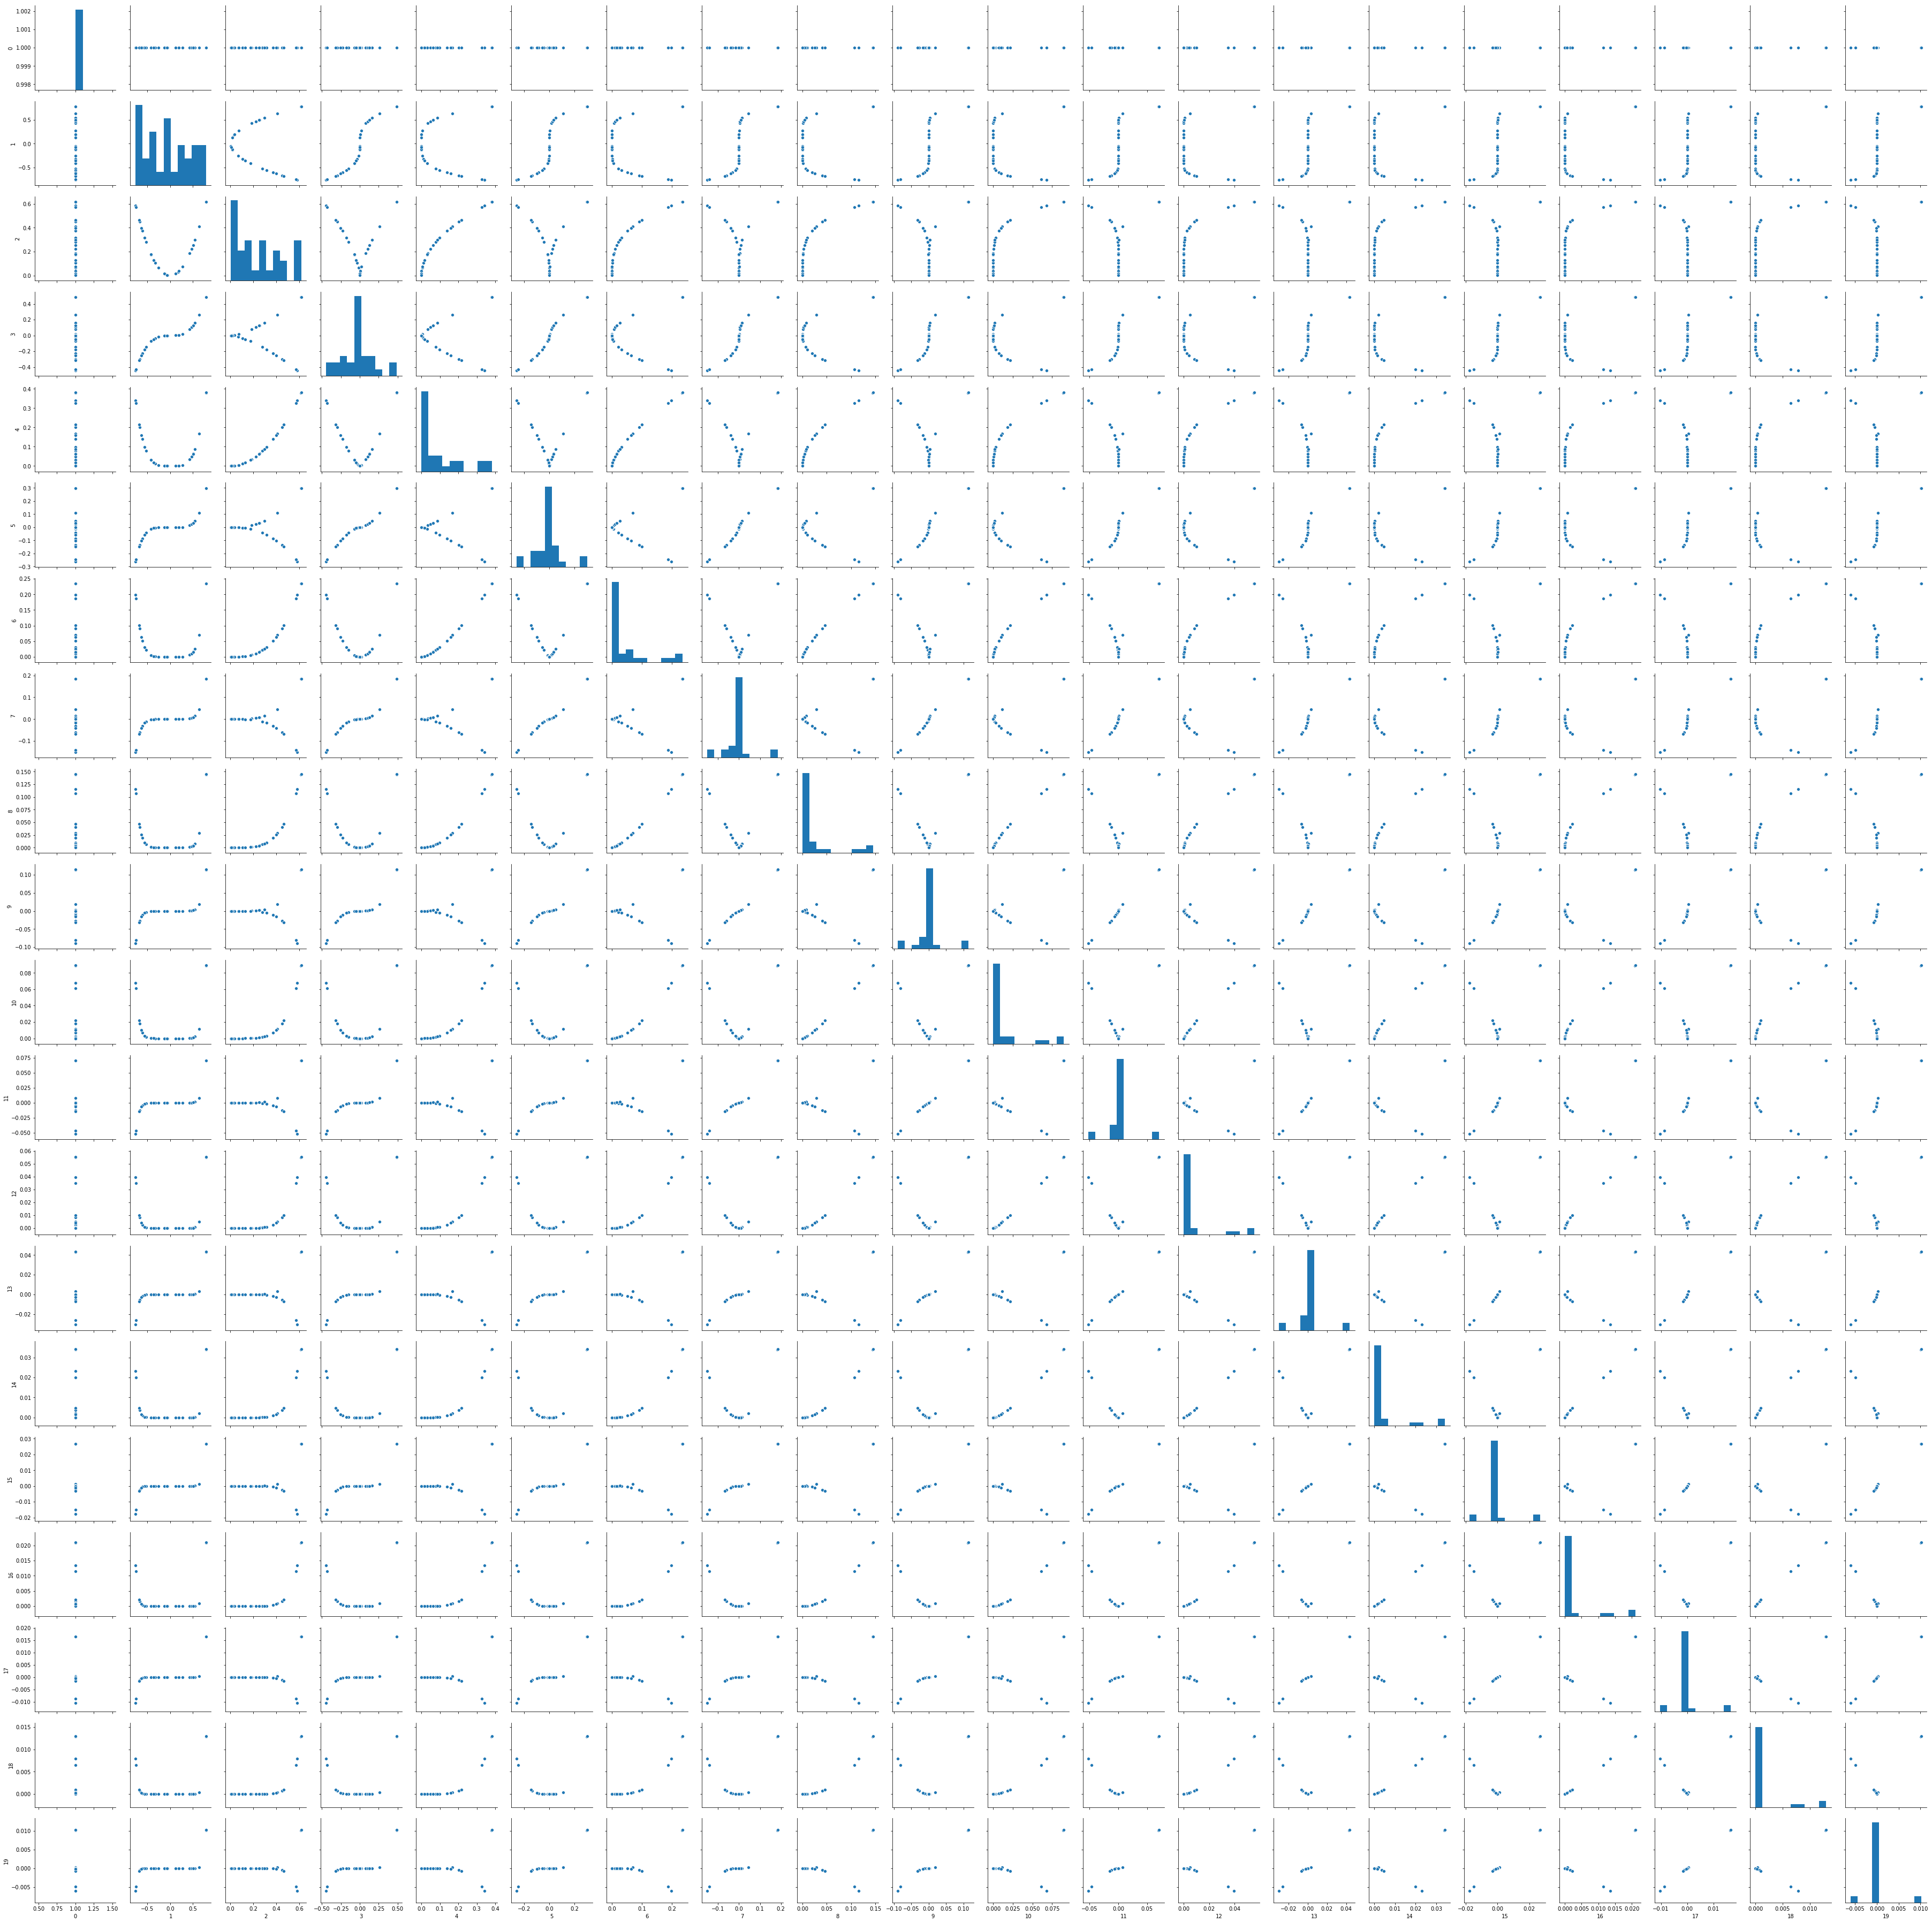

In [9]:
df=pd.DataFrame(X_train)
df.corr()
#df.plot()
#df.plot.scatter(x=0,y=4)

import seaborn as sns
%matplotlib inline
sns.pairplot(df)

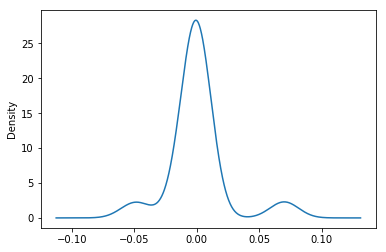

In [11]:
df[11].plot.density()

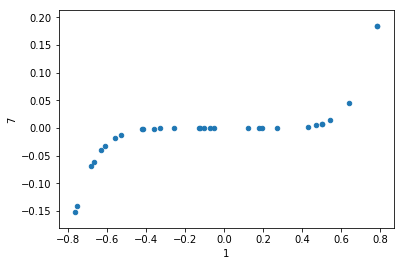

In [16]:
df.plot.scatter(x=1,y=7)

### 2: features 

In [30]:
#  kind of features are these
print('X_train and X_test has 30 rows and 20 columns/variables, features are polynomial basis function which degree 19')

X_train and X_test has 30 rows and 20 columns/variables, all 20 features are correlated, features are polynomial basis function


## Ordinary least square (Maximum likelihood estimate)

### 3: visualize OLS fit

Coefficients:
[ 0.00000000e+00  3.89289257e+00  2.75092484e+01 -1.56008391e+02
 -2.37440839e+03  1.15004182e+03  5.49024035e+04  2.57359643e+04
 -5.72708356e+05 -4.68164641e+05  3.20731933e+06  3.15310615e+06
 -1.02714764e+07 -1.10335701e+07  1.87887754e+07  2.12217275e+07
 -1.82141742e+07 -2.12266255e+07  7.24292684e+06  8.61719834e+06]
0.15830210814026097


(-2, 2)

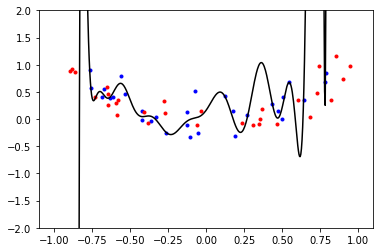

In [21]:
ols = LinearRegression().fit(X_train,y_train)
y_ols_train = ols.predict(X_train)
y_ols_test = ols.predict(X_test)
y_ols_plot = ols.predict(X_plot)

print("Coefficients:")
print(ols.coef_)
print(ols.intercept_)

# plot training data, test data, and fit (1 point)
# give a point if you see all three things
plt.plot(x_train, y_train, 'b.')
plt.plot(x_test, y_test, 'r.')
plt.plot(x_plot, y_ols_plot, 'k-')
plt.ylim([-2,2])

### 4:empirical errors 

In [22]:
# The empirical square deviation (error) of the training data from the OLS fit
train_err = np.mean((y_train - y_ols_train)**2)
print("Train err",train_err)

# The empirical square deviation (error) of the test data from the OLS fit
test_err = np.mean((y_test- y_ols_test)**2)
print("test_err",test_err)




Train err 0.023773671422127225
test_err 304430106.3535963
test_err is largest 304430106.3535963
expected_err is medium 0.04000000000000001
train_err is smallest 0.023773671422127225
smallest_err = 0.023773671422127225, medium_err = 0.04000000000000001, largest_err = 304430106.3535963


### Cross-validation error
In real setting, we will have access to neither the true expected error nor test error because we will not know the true function, the true noise distribution, and test data. One thing we can do is to approximate the test error by cross-validation error.

### 5: cross-validation (CV) error usage 

In [23]:
n_splits = 5
cv_err = 0
kf = KFold(n_splits=n_splits)
for train_index, vali_index in kf.split(x_train):
    X_sub_train, X_vali = X_train[train_index,:], X_train[vali_index,:]
    y_sub_train, y_vali = y_train[train_index], y_train[vali_index]
    #  OLS fit on a subset of training data 
    ols = LinearRegression().fit(X_sub_train,y_sub_train) 
    # make predictions on validation set
    y_ols_vali = ols.predict(X_vali)
    # calculate cross-validation error 
    cv_err += np.mean((y_vali-y_ols_vali)**2)
    print("individual error for a particular split",cv_err)
   
cv_err = cv_err/n_splits # this is the cross-validation error
print("cross validation error",cv_err)

if(cv_err>train_err):
    print("cv_err is approximation of the test_err, cv_err is {} too much greater than train_err {}".format(cv_err, train_err))
print("The cross validation error(estimated test error) is very high and OLS train_err is very low, thus we can say it is overfitting")
# show a quantity that supports the answer above
print("Difference between cv_err and train_err shows the overfitting",cv_err - train_err)

individual error for a particular split 5.604376854852011
individual error for a particular split 468.9788873144128
individual error for a particular split 469.3299276692546
individual error for a particular split 35687533499.279076
individual error for a particular split 35687533518.90852
cross validation error 7137506703.781705
cv_err is approximation of the test_err, cv_err is 7137506703.781705 too much greater than train_err 0.023773671422127225
The cross validation error(estimated test error) is very high and OLS train_err is very low, thus we can say it is overfitting
Difference between cv_err and train_err shows the overfitting 7137506703.757931


## Ridge regression (a Maximum a Posteriori)

### 6: visualize ridge regression fit

Coefficients:
[ 0.          0.01637225  0.56163864 -0.04929732  0.31121297 -0.01312378
  0.16597281  0.00194651  0.09188052  0.00569348  0.05262356  0.00550424
  0.03082568  0.00431911  0.0183037   0.00311657  0.01095548  0.00215491
  0.00658856  0.00145331]
0.09314976109120726


(-2, 2)

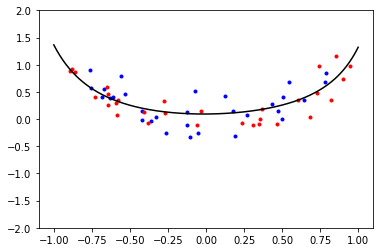

In [24]:
a = 1 # set lambda value
ridge = Ridge(alpha=a).fit(X_train, y_train) 
y_ridge_train = ridge.predict(X_train)
y_ridge_test = ridge.predict(X_test)
y_ridge_plot = ridge.predict(X_plot)

print("Coefficients:")
print(ridge.coef_)
print(ridge.intercept_)

# plot training data, test data, and fit

plt.plot(x_train, y_train, 'b.')
plt.plot(x_test, y_test, 'r.')
plt.plot(x_plot, y_ridge_plot, 'k-')
plt.ylim([-2,2])

### 7: Choose Ridge parameter with cross-validation

The aplha which minimizes the cross validation error is 0.264


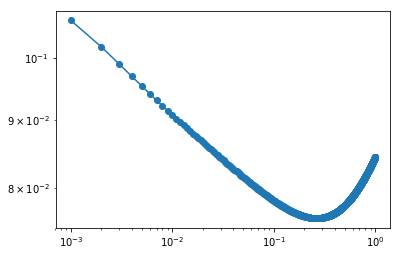

In [25]:
n_splits = 5
# choose alpha range so that you see a U shape on the CV error
#alphas = [.08,.09,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
alphas=np.linspace(.0010,1,1000)
errors = np.zeros_like(alphas)
kf = KFold(n_splits=n_splits)
for i, alpha in enumerate(alphas):
    error = 0
    for train_index, vali_index in kf.split(x_train):
        X_sub_train, X_vali = X_train[train_index,:], X_train[vali_index,:]
        y_sub_train, y_vali = y_train[train_index], y_train[vali_index]
        # ridge fit on a subset of training data 
        ridge = Ridge(alpha=alpha).fit(X_sub_train,y_sub_train)
        # make predictions on validation set 
        y_ridge_vali = ridge.predict(X_vali)
        # calculate validation error 
        error += np.mean((y_vali-y_ridge_vali)**2)
    errors[i] = error/n_splits
    
# Visualize the cross-validation error.
# If a U shape is shown with a minimum
plt.loglog(alphas, errors, '-o')

# print the value of alpha that minimizes the cross-validation error 
print("The aplha which minimizes the cross validation error is",alphas[errors.argmin()])


### Ridge regression with cross-validated parameter 

Coefficients:
[ 0.          0.05654595  0.7985508  -0.12278961  0.39963685 -0.03054131
  0.18874308  0.00309583  0.09707744  0.00977885  0.05429721  0.00869986
  0.03202735  0.00628757  0.01940577  0.0042206   0.01189128  0.00274696
  0.00731224  0.00176388]
0.027808128927994613


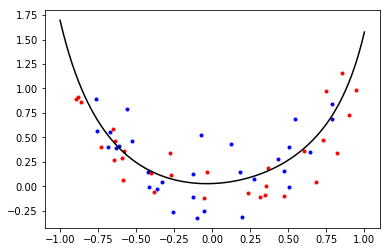

In [26]:
a = alphas[errors.argmin()] # use the alpha that minimizes CV error
ridge = Ridge(alpha=a).fit(X_train, y_train) 
y_ridge_train = ridge.predict(X_train)
y_ridge_test = ridge.predict(X_test)
y_ridge_plot = ridge.predict(X_plot)

print("Coefficients:")
print(ridge.coef_)
print(ridge.intercept_)

# visualize fit
plt.plot( x_train,y_train, 'b.')
plt.plot(x_test, y_test, 'r.')
plt.plot(x_plot, y_ridge_plot, 'k-')

###  8: did ridge regression help to reduce overfitting

In [27]:
#  training error with optimized alpha parameter 
ridge_train_err = np.mean((y_train-y_ridge_train )**2)

#  minimum of ridge cv error 
ridge_min_cv_err =errors.min()

# test error with optimized alpha parameter
ridge_test_err = np.mean((y_test - y_ridge_test)**2) 

# Use these errors to show that ridge regression helped to reduce overfitting. 
print('Ridge training error = {}'.format(ridge_train_err))
print('Ridge minimum CV error = {}'.format(ridge_min_cv_err))
print('Ridge test error = {}'.format(ridge_test_err))
print('Difference between training error and test error is reduced ', ridge_test_err- ridge_train_err)
print('Difference between cv err and test err is also reduced', ridge_min_cv_err  - ridge_test_err)

Ridge training error = 0.05185696323712871
Ridge minimum CV error = 0.07600260741938429
Ridge test error = 0.050679146017182736
Difference between training error and test error is reduced  -0.0011778172199459758
Difference between cv err and test err is also reduced 0.025323461402201555


### Bayesian linear regression

Following (7.55)--(7.58) in Murphy, the posterior on the weights are given by:

$p(\mathbf{w}|\mathbf{X},\mathbf{y},\sigma^2) = N(\mathbf{w}|\mathbf{w}_N,\mathbf{V}_N)$

$\mathbf{w}_N = \mathbf{V}_N \mathbf{V}_0^{-1} \mathbf{w}_0 + \frac{1}{\sigma^2} \mathbf{V}_N \mathbf{X}^T \mathbf{y}$

$\mathbf{V}_N^{-1} = \mathbf{V}_0^{-1} + \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X}$

The assumptions are that the $\mathbf{X}$ has been centered, i.e., $\sum_i x_{ij}=0$ for each feature $j$ ($i$ index data point), and that $\mathbf{y}$ is also centered, i.e., do $\mathbf{y} \leftarrow \mathbf{y} - \mathrm{mean}(\mathbf{y})$.

Following (7.60)--(7.62) in Murphy, the posterier predictive is given by:

$p(y|\mathbf{x},D,\sigma^2) = N(y|\mathbf{w}_N^T \mathbf{x}, \sigma^2 + \mathbf{x}^T\mathbf{V}_N \mathbf{x})$

Normal font indicates scalar; lower-case bold font indicates vector; and upper-case bold font indicates matrix.

###  9: caluclate predictive mean and variance of BLR 

In [28]:
def center_Xy(X, y):
    X_mean = np.mean(X, axis=0)
    y_mean = np.mean(y)
    X_centered = X - X_mean # automatic broadcasting
    y_centered = y - y_mean
    return X_centered, y_centered

# initialize variables and priors
n_data, n_feature = X_train.shape
a = alphas[errors.argmin()] # the same alpha as that in ridge regression
tau_sq = sig**2/a # following text after (7.58) in Murphy
w_0 = np.zeros([n_feature,1])
V_0_inv = 1/tau_sq*np.eye(n_feature)

# center X's and y's
X_train_centered, y_train_centered = center_Xy(X_train, y_train)
X_test_centered, y_test_centered = center_Xy(X_test, y_test)
X_plot_centered, _ = center_Xy(X_plot, y_test)

# posterior
V_N_inv = V_0_inv + 1/(sig**2)*X_train_centered.T.dot(X_train_centered)
V_N = np.linalg.inv(V_N_inv) # only useful for small amount of data
w_N = 1/(sig**2)*V_N.dot(X_train_centered.T).dot(y_train_centered) # the first term is 0 because w_0 is 0

# predictive distribition on training
# Fix the bug in the following line (1 point).
#y_blr_train = (w_N.T).dot(X_train_centered) 
y_blr_train=X_train_centered.dot(w_N)
y_blr_train_var = sig**2 + X_train_centered.dot(V_N).dot(X_train_centered.T)



# predictive distribition on test

y_blr_test = X_test_centered.dot(w_N)
y_blr_test_var = sig**2 + X_test_centered.dot(V_N).dot(X_test_centered.T)

# predictive distribition on plot

y_blr_plot =X_plot_centered.dot(w_N)
y_blr_plot_var = sig**2 + X_plot_centered.dot(V_N).dot(X_plot_centered.T)

###  10: observations on BLR

Ridge training error = 0.05185696323712871
BLR training error = 0.05185696323712871
The training errors from ridge regression and BLR turn out to be the same!
Yes
a = alphas[errors.argmin()]
tau_sq = sig**2/a
If w0 = 0 and V0 = τ^2I, then the posterior mean reduces to the ridge estimate, if we define λ  = σ^2/ τ^2 . This is because the mean and mode of a Gaussian are the same.
 To get this λ= σ^2/τ^2 => τ^2=σ^2/ λ => we have λ from aplhas which gave minimun error i.e .3 in my case
Write answere here
Solid line represent Posterior mean, also we can say it is Prediction 
Write answere here
Dotted line are error bars representing noise variance or we can say it is confidence interval
Write answere here
At -1 and 1 there are almost no data points, therefore it is moving away from mean, meaning adding more interval for prediction
Write answere here
Where we have training data variance is less and where we don't have training data variance is large


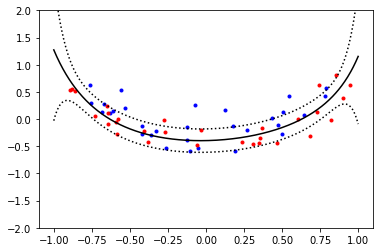

In [29]:
# print("Coefficients: {}".format(w_N))

# training error 
blr_train_err = np.mean((y_train_centered-y_blr_train)**2)


#  test error 
blr_test_err = np.mean((y_test_centered-y_blr_test)**2)

print('Ridge training error = {}'.format(ridge_train_err))
print('BLR training error = {}'.format(blr_train_err))
print('The training errors from ridge regression and BLR turn out to be the same!')
print('Yes')


print('a = alphas[errors.argmin()]')
print('tau_sq = sig**2/a')
print('If w0 = 0 and V0 = τ^2I, then the posterior mean reduces to the ridge estimate, if we define λ  = σ^2/ τ^2 . This is because the mean and mode of a Gaussian are the same.')

# the interpretation of tau_sq
print( ' To get this λ= σ^2/τ^2 => τ^2=σ^2/ λ => we have λ from aplhas which gave minimun error i.e .3 in my case')

# visualize the fit
plt.plot(x_train, y_train - y_train.mean(), 'b.')
plt.plot(x_test, y_test - y_test.mean(), 'r.')
plt.plot(x_plot, y_blr_plot, 'k-')
plt.plot(x_plot, y_blr_plot + np.sqrt(y_blr_plot_var.diagonal()), 'k:')
plt.plot(x_plot, y_blr_plot - np.sqrt(y_blr_plot_var.diagonal()), 'k:')
plt.ylim([-2,2])

# The solid line represent
print('Write answere here')
print('Solid line represent Posterior mean, also we can say it is Prediction ')

# The dotted lines represent
print('Write answere here')
print('Dotted line are error bars representing noise variance or we can say it is confidence interval')

# The behavior of the two dotted lines hear x=-1 and x=1
print('Write answere here')
print('At -1 and 1 there are almost no data points, therefore it is moving away from mean, meaning adding more interval for prediction')

# the dotted lines behave in this way
print('Write answere here')
print("Where we have training data variance is less and where we don't have training data variance is large")